In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np

sns.set_theme(style="whitegrid")

results_path = "experiment_results.json"
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print("Data loaded successfully. First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
else:
    print(f"Error: {results_path} not found. Please ensure your results file exists.")
    df = pd.DataFrame() 


for col in ['direct_greedy_ratio', 'hypergraph_algo_ratio', 'genetic_algo_ratio']:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Coerce errors will turn 'N/A' or inf into NaN

df['log_num_nodes'] = df['num_nodes'].apply(lambda x: pd.NA if x <= 0 else (x if x == 1 else np.log10(x)))
size_order = ["n10", "n100", "n1000"] 
df['size_category'] = pd.Categorical(df['size_category'], categories=size_order, ordered=True)

Data loaded successfully. First 5 rows:
                 graph_id size_category graph_type  num_nodes  num_edges  \
0  tree_079_binary_04.gml           n10      trees         10          9   
1    tree_029_star_14.gml           n10      trees         10          9   
2    tree_042_path_12.gml           n10      trees         10          9   
3  tree_095_spider_05.gml           n10      trees         10          9   
4  tree_011_random_11.gml           n10      trees         10          9   

   true_mv_num  direct_greedy_size  direct_greedy_runtime  \
0            2                   2               0.000512   
1            9                   2               0.000480   
2            2                   2               0.000311   
3            8                   2               0.000474   
4            3                   2               0.000372   

   direct_greedy_ratio  hypergraph_algo_size  hypergraph_algo_runtime  \
0             1.000000                     2                 0.

In [12]:
avg_performance = df.groupby(['graph_type', 'size_category']).agg(
    avg_direct_ratio=('direct_greedy_ratio', 'mean'),
    avg_hyper_ratio=('hypergraph_algo_ratio', 'mean'),
    avg_genetic_ratio=('genetic_algo_ratio', 'mean'),
    avg_direct_runtime=('direct_greedy_runtime', 'mean'),
    avg_hyper_runtime=('hypergraph_algo_runtime', 'mean'),
    avg_genetic_runtime=('genetic_algo_runtime', 'mean')
).reset_index()

print("\nAverage Performance by Graph Type and Size:")
print(avg_performance.round(3))


Average Performance by Graph Type and Size:
  graph_type size_category  avg_direct_ratio  avg_hyper_ratio  \
0      grids           n10             0.783            0.727   
1      grids          n100               NaN              NaN   
2      grids         n1000               NaN              NaN   
3      trees           n10             0.563            1.000   
4      trees          n100               NaN              NaN   
5      trees         n1000               NaN              NaN   

   avg_genetic_ratio  avg_direct_runtime  avg_hyper_runtime  \
0              0.917               0.002              0.001   
1                NaN                 NaN                NaN   
2                NaN                 NaN                NaN   
3              1.007               0.000              0.000   
4                NaN                 NaN                NaN   
5                NaN                 NaN                NaN   

   avg_genetic_runtime  
0                0.129  
1      

/var/folders/vd/mpncy78j5clgh4cw59z7l0n80000gn/T/ipykernel_57154/3615837229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_performance = df.groupby(['graph_type', 'size_category']).agg(


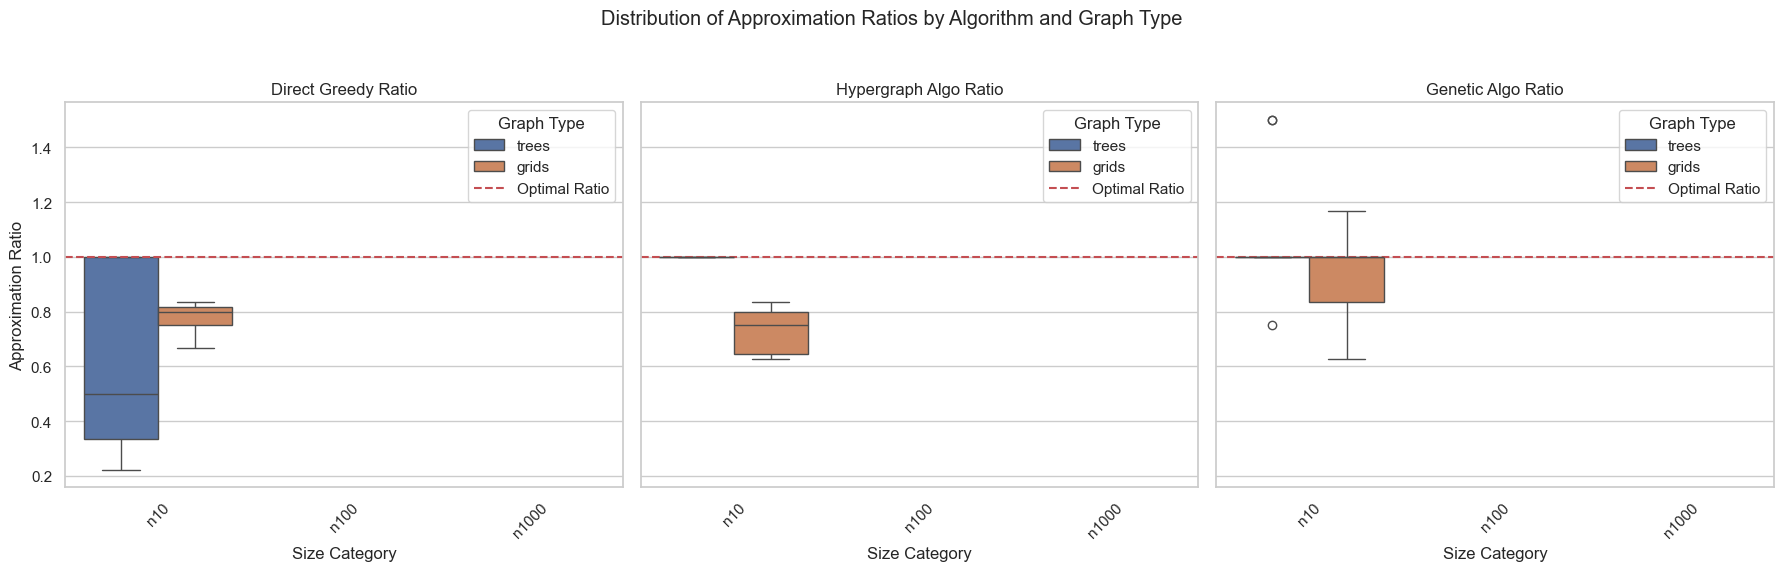

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Approximation Ratios by Algorithm and Graph Type')

# Direct Greedy
sns.boxplot(x='size_category', y='direct_greedy_ratio', hue='graph_type', data=df, ax=axes[0])
axes[0].set_title('Direct Greedy Ratio')
axes[0].set_ylabel('Approximation Ratio')
axes[0].set_xlabel('Size Category') # Changed label
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=1.0, color='r', linestyle='--', label='Optimal Ratio') # Add line for optimal ratio
axes[0].legend(title='Graph Type')


# Hypergraph Algo
sns.boxplot(x='size_category', y='hypergraph_algo_ratio', hue='graph_type', data=df, ax=axes[1])
axes[1].set_title('Hypergraph Algo Ratio')
axes[1].set_ylabel('') # Shared Y-axis
axes[1].set_xlabel('Size Category') # Changed label
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=1.0, color='r', linestyle='--', label='Optimal Ratio')
axes[1].legend(title='Graph Type')


# Genetic Algo
sns.boxplot(x='size_category', y='genetic_algo_ratio', hue='graph_type', data=df, ax=axes[2])
axes[2].set_title('Genetic Algo Ratio')
axes[2].set_ylabel('') # Shared Y-axis
axes[2].set_xlabel('Size Category') # Changed label
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=1.0, color='r', linestyle='--', label='Optimal Ratio')
axes[2].legend(title='Graph Type')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

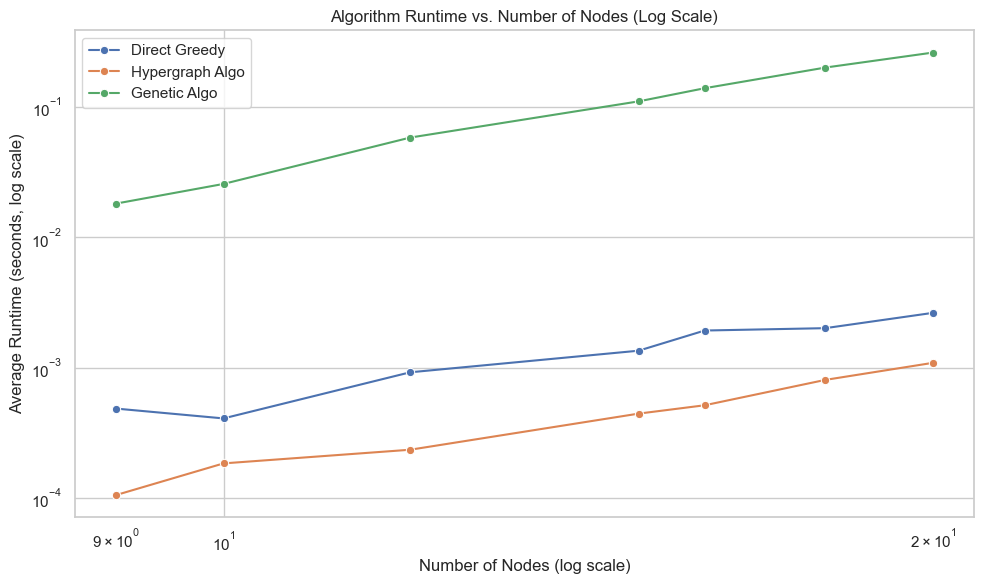

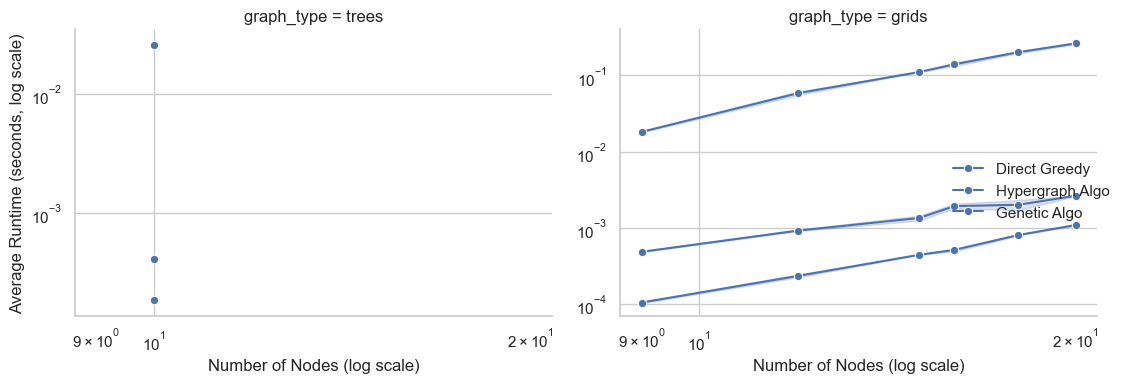

In [ ]:
gi